In [16]:
import numpy
import math
from matplotlib import pyplot
# Display figures in the noteboook
%matplotlib inline

In [17]:
N=200                       # Number of points in each direction
x_start,x_end=-4.0,4.0      # x-direction boundaries
y_start,y_end=-2.0,2.0      # y-direction boundaries
x=numpy.linspace(x_start,x_end,N)   # 1-D array for x
y=numpy.linspace(y_start,y_end,N)   # 1-D array for y
X,Y=numpy.meshgrid(x,y)             # generates a mesh grid

In [18]:
numpy.shape(X)

(200, 200)

In [19]:
u_inf=1.0                          # freestream speed

# compute freestream velocity field
u_freestream=u_inf*numpy.ones((N,N), dtype=float)
v_freestream=numpy.zeros((N,N), dtype=float)

# compute the stream function
psi_freestream=u_inf*Y

In [20]:
def get_velocity(strength, xs, ys, X, Y):
    """
    Returns the velocity field generated by a source/sink

    Parameters
    ----------
    strength: float
        Strength of the source/sink
    xs: float
        x-coordinate of the source/sink
    ys: float
        y-coordinate of the source/sink
    X: 2D Numpy array of floats
        x-coordinate of the mesh points
    Y: 2D Numpy array of floats
        y-coordinate of the mesh points

    Returns
    -------
    u: 2D Numpy array of floats
        x-component of the velocity vector field
    v: 2D Numpy array of floats
        y-component of the velocity vector field
    """
    u=strength/(2*numpy.pi)*(X-xs)/((X-xs)**2+(Y-ys)**2)
    v=strength/(2*numpy.pi)*(Y-ys)/((X-xs)**2+(Y-ys)**2)

    return u,v

In [21]:
help(get_velocity)

Help on function get_velocity in module __main__:

get_velocity(strength, xs, ys, X, Y)
    Returns the velocity field generated by a source/sink
    
    Parameters
    ----------
    strength: float
        Strength of the source/sink
    xs: float
        x-coordinate of the source/sink
    ys: float
        y-coordinate of the source/sink
    X: 2D Numpy array of floats
        x-coordinate of the mesh points
    Y: 2D Numpy array of floats
        y-coordinate of the mesh points
    
    Returns
    -------
    u: 2D Numpy array of floats
        x-component of the velocity vector field
    v: 2D Numpy array of floats
        y-component of the velocity vector field



In [22]:
def get_stream_function(strength, xs, ys, X, Y):
    """
    Returns the stream function generated by a source/sink
    
    Parameters
    ----------
    strength: float
        strength of the source/sink
    xs: float
        x-coordinate of the source/sink
    ys: float
        y-coordinate of the source/sink
    X: 2D Numpy array of floats
        x-coordinate of the mesh points
    Y: 2D Numpy array of floats
        y-coordinate of the mesh points   # Ask about this
        
    Returns
    -------
    psi: 2D Numpy array of floats
        The stream function
    """
    psi=strength/(2*numpy.pi)*numpy.arctan2((Y-ys), (X-xs))
    
    return psi

In [23]:
strength_source = 5.0                 # strength of the source
x_source, y_source = -1.0, 0.0        # location of the source

# compute the velocity field
u_source, v_source = get_velocity(strength_source, x_source, y_source, X, Y)

# compute the stream function
psi_source = get_stream_function(strength_source, x_source, y_source, X, Y)

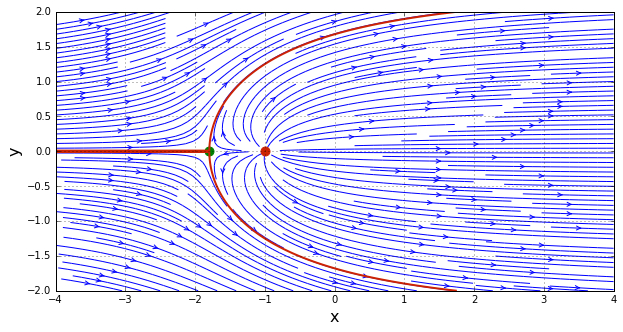

In [24]:
# superposition of the source on the freestream
u = u_freestream + u_source
v = v_freestream + v_source
psi = psi_freestream + psi_source

# plot the streamlines
size = 10
pyplot.figure(figsize=(size,(y_end-y_start)/(x_end-x_start)*size))
pyplot.grid(True)
pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('y', fontsize=16)
pyplot.xlim(x_start, x_end)
pyplot.ylim(y_start, y_end)
pyplot.streamplot(X, Y, u, v, density=2, linewidth=1, arrowsize=1, arrowstyle='->')
pyplot.scatter(x_source, y_source, color='#CD2305', s=80, marker='o')  #shows the source pt.

# calculate the stagnation point
x_stagnation = x_source - strength_source/(2*numpy.pi*u_inf)
y_stagnation = y_source

# display the stagnation point
pyplot.scatter(x_stagnation, y_stagnation, color='g', s=80, marker='o')

# display the dividing streamline
pyplot.contour(X, Y, psi, 
              levels=[-strength_source/2, +strength_source/2],
              colors='#CD2305', linewidths=2, linestyles='solid');

## What is the maximum width of the Rankine Half Body
When x becomes very large, velocity over the object becomes u_freestream. By conservation of mass, u_freestream*width=mass. Thus, width=mass/u_freestream

In [42]:
strength_sink = -5.0              # strength of the sink
x_sink, y_sink = 1.0, 0.0         # sink location

# compute velocity field on mesh grid
u_sink, v_sink = get_velocity(strength_sink, x_sink, y_sink, X, Y)

# compute stream-function on mesh grid
psi_sink = get_stream_function(strength_sink, x_sink, y_sink, X, Y)

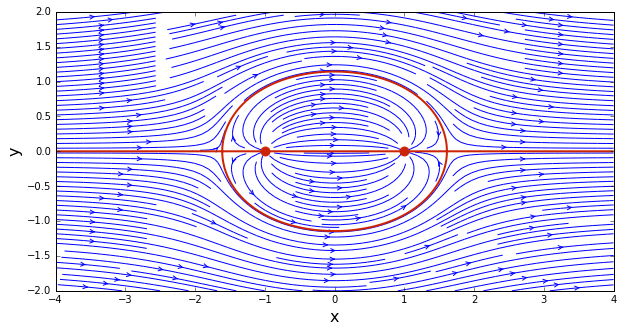

In [43]:
# superposition of a source and a sink on the freestream
u = u_freestream + u_source + u_sink
v = v_freestream + v_source + v_sink
psi = psi_freestream + psi_source + psi_sink

# plot the streamlines
size = 10
pyplot.figure(figsize=(size, (y_end-y_start)/(x_end-x_start)*size))
pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('y', fontsize=16)
pyplot.xlim(x_start, x_end)
pyplot.ylim(y_start, y_end)
pyplot.streamplot(X, Y, u, v, density=2, linewidth=1, arrowsize=1, arrowstyle='->')
pyplot.scatter([x_source, x_sink], [y_source, y_sink], color='#CD2305', s=80, marker='o')
pyplot.contour(X, Y, psi, levels=[0], colors='#CD2305', linewidths=2, linestyles='solid');

## What is the length and width of the Rankine Oval?
Length = distance between stagnation points

Width: find the y value where the y-axis intersects the streamline psi=0.

From observing the graph, looks like:
Length ~3
Width ~2.5

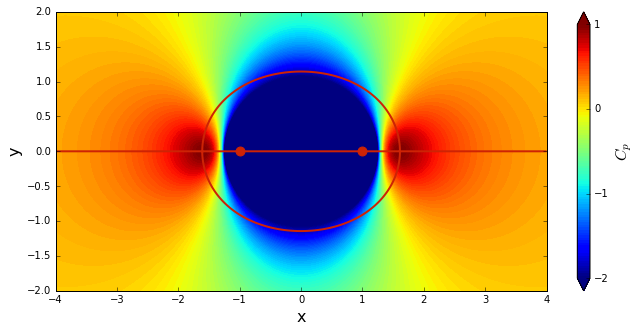

In [27]:
# compute the pressure coefficient field
cp = 1.0 - (u**2+v**2)/u_inf**2

# plot the pressure coefficient field
size = 10
pyplot.figure(figsize=(1.1*size, (y_end-y_start)/(x_end-x_start)*size))
pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('y', fontsize=16)
pyplot.xlim(x_start,x_end)
pyplot.ylim(y_start,y_end)
contf = pyplot.contourf(X, Y, cp, levels=numpy.linspace(-2.0, 1, 100), extend='both')
cbar = pyplot.colorbar(contf)
cbar.set_label('$C_p$', fontsize=16)
cbar.set_ticks([-2.0, -1.0, 0.0, 1.0])
pyplot.scatter([x_source,x_sink], [y_source,y_sink], color='#CD2305', s=80, marker='o')
pyplot.contour(X, Y, psi, levels=[0], colors='#CD2305', linewidths=2, linestyles='solid');

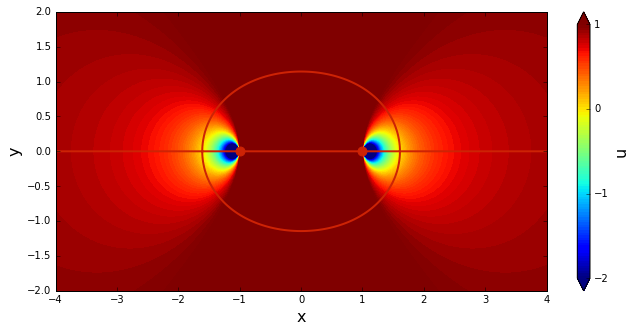

In [36]:
size = 10
pyplot.figure(figsize=(1.1*size, (y_end-y_start)/(x_end-x_start)*size))
pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('y', fontsize=16)
pyplot.xlim(x_start,x_end)
pyplot.ylim(y_start,y_end)
contf = pyplot.contourf(X, Y, u, levels=numpy.linspace(-2.0, 1, 100), extend='both')
cbar = pyplot.colorbar(contf)
cbar.set_label('u', fontsize=16)
cbar.set_ticks([-2.0, -1.0, 0.0, 1.0])
pyplot.scatter([x_source,x_sink], [y_source,y_sink], color='#CD2305', s=80, marker='o')
pyplot.contour(X, Y, psi, levels=[0], colors='#CD2305', linewidths=2, linestyles='solid');

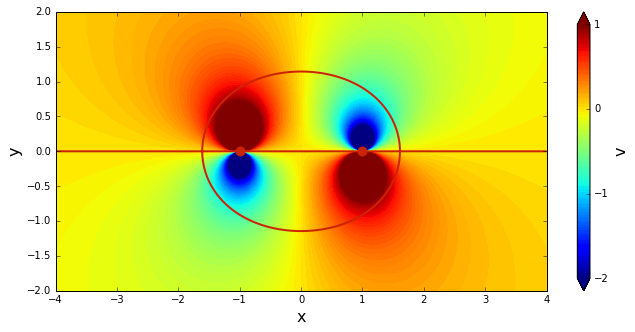

In [37]:
size = 10
pyplot.figure(figsize=(1.1*size, (y_end-y_start)/(x_end-x_start)*size))
pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('y', fontsize=16)
pyplot.xlim(x_start,x_end)
pyplot.ylim(y_start,y_end)
contf = pyplot.contourf(X, Y, v, levels=numpy.linspace(-2.0, 1, 100), extend='both')
cbar = pyplot.colorbar(contf)
cbar.set_label('v', fontsize=16)
cbar.set_ticks([-2.0, -1.0, 0.0, 1.0])
pyplot.scatter([x_source,x_sink], [y_source,y_sink], color='#CD2305', s=80, marker='o')
pyplot.contour(X, Y, psi, levels=[0], colors='#CD2305', linewidths=2, linestyles='solid');

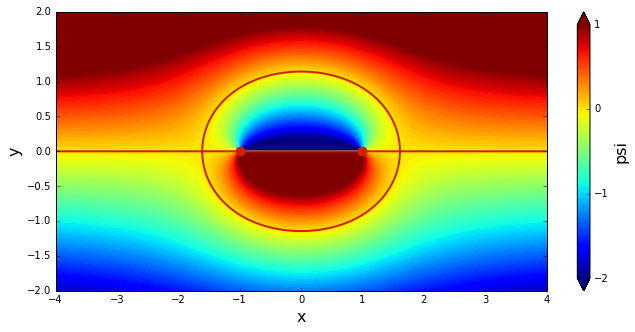

In [35]:
size = 10
pyplot.figure(figsize=(1.1*size, (y_end-y_start)/(x_end-x_start)*size))
pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('y', fontsize=16)
pyplot.xlim(x_start,x_end)
pyplot.ylim(y_start,y_end)
contf = pyplot.contourf(X, Y, psi, levels=numpy.linspace(-2.0, 1, 100), extend='both')
cbar = pyplot.colorbar(contf)
cbar.set_label('psi', fontsize=16)
cbar.set_ticks([-2.0, -1.0, 0.0, 1.0])
pyplot.scatter([x_source,x_sink], [y_source,y_sink], color='#CD2305', s=80, marker='o')
pyplot.contour(X, Y, psi, levels=[0], colors='#CD2305', linewidths=2, linestyles='solid');